In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [25]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [26]:
data.shape

(42000, 785)

In [27]:
data_val = data[0:1000].T
Y_val = data_val[0]
X_val = data_val[1:n]
X_val = X_val / 255.

In [28]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [29]:
#initialising paramaeters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [30]:
# ReLU
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [31]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [32]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [33]:
def ReLU_deriv(Z):
    return Z > 0

In [34]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [35]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [36]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [37]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [38]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 5 5 ... 7 6 0] [3 1 3 ... 1 8 6]
0.1578048780487805
Iteration:  10
[7 5 2 ... 1 4 6] [3 1 3 ... 1 8 6]
0.23295121951219513
Iteration:  20
[7 5 0 ... 1 4 6] [3 1 3 ... 1 8 6]
0.31053658536585366
Iteration:  30
[7 1 0 ... 1 4 6] [3 1 3 ... 1 8 6]
0.37621951219512195
Iteration:  40
[7 1 0 ... 1 4 6] [3 1 3 ... 1 8 6]
0.4286829268292683
Iteration:  50
[7 1 3 ... 1 5 6] [3 1 3 ... 1 8 6]
0.47673170731707315
Iteration:  60
[7 1 3 ... 1 5 6] [3 1 3 ... 1 8 6]
0.5269756097560976
Iteration:  70
[5 1 3 ... 1 5 6] [3 1 3 ... 1 8 6]
0.5613414634146342
Iteration:  80
[3 1 3 ... 1 5 6] [3 1 3 ... 1 8 6]
0.5898048780487805
Iteration:  90
[3 1 3 ... 1 5 6] [3 1 3 ... 1 8 6]
0.6118536585365854
Iteration:  100
[3 1 3 ... 1 5 6] [3 1 3 ... 1 8 6]
0.6312682926829268
Iteration:  110
[3 3 3 ... 1 5 6] [3 1 3 ... 1 8 6]
0.649829268292683
Iteration:  120
[3 3 3 ... 1 5 6] [3 1 3 ... 1 8 6]
0.6663414634146342
Iteration:  130
[3 3 3 ... 1 5 6] [3 1 3 ... 1 8 6]
0.6794878048780488
Iteration:  14

In [39]:
## Predictions

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


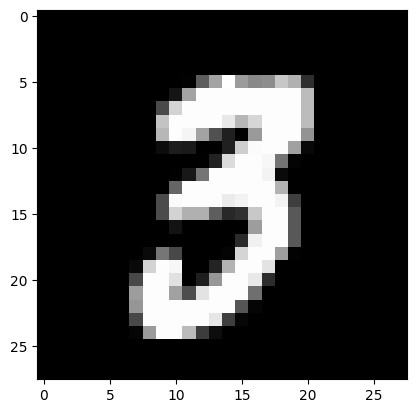

Prediction:  [3]
Label:  8


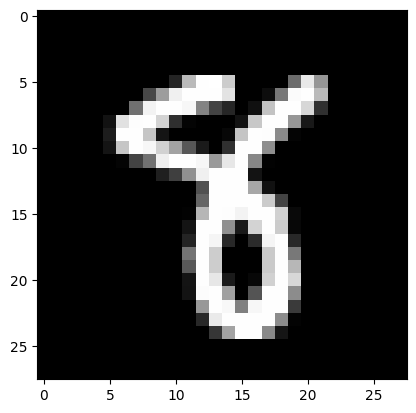

In [41]:
test_prediction(12, W1, b1, W2, b2)
test_prediction(25, W1, b1, W2, b2)


In [43]:
dev_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_val)

[6 8 3 9 2 3 3 7 6 8 4 0 7 6 2 6 0 5 6 1 0 8 3 5 6 7 2 9 8 0 7 6 7 8 6 8 0
 0 5 7 0 1 5 8 8 1 7 7 8 2 3 1 3 1 0 4 6 4 8 2 1 9 5 5 4 6 6 9 4 4 5 3 3 9
 4 8 4 0 3 7 5 3 7 1 3 8 2 1 7 7 6 5 4 0 9 2 6 7 1 2 6 1 5 8 4 2 5 3 1 2 9
 4 9 6 4 7 0 9 8 3 3 9 3 8 8 7 0 9 8 2 3 5 9 1 9 1 0 3 9 8 0 7 9 2 9 1 6 0
 1 9 0 5 3 2 0 6 8 6 8 9 7 1 2 9 9 8 4 1 5 6 3 5 5 8 7 9 0 8 8 9 1 6 6 6 2
 5 1 9 2 6 7 5 2 7 8 0 8 8 1 3 1 8 5 7 7 6 4 3 7 6 0 3 3 2 5 3 4 0 0 6 1 1
 9 7 6 8 9 2 0 0 5 8 5 6 1 1 3 9 9 0 5 8 9 9 1 1 5 7 2 8 9 7 8 8 2 4 2 4 3
 7 8 1 2 4 7 3 4 4 4 2 6 6 6 1 4 6 1 1 4 5 6 2 2 1 6 4 3 6 8 1 2 2 9 0 5 7
 3 9 0 1 3 9 6 7 9 1 0 3 1 8 1 7 6 8 4 5 4 8 1 6 8 2 1 7 4 1 7 6 5 8 0 2 9
 1 7 1 8 1 4 8 3 6 8 6 7 8 0 1 9 1 7 4 1 6 8 6 2 7 0 2 6 7 5 3 9 4 7 1 8 6
 4 3 8 2 8 4 2 5 2 4 2 1 4 7 0 8 1 3 7 7 0 9 8 3 4 1 7 8 5 4 1 2 8 5 4 6 7
 1 3 8 5 7 6 1 7 9 2 3 8 1 8 5 1 6 6 3 1 8 0 4 9 4 8 4 9 8 3 9 4 6 0 4 7 6
 1 8 2 8 1 0 9 3 8 4 2 3 4 8 2 6 0 2 4 4 2 2 1 2 4 4 9 9 1 7 6 2 5 7 1 9 8
 8 3 1 9 8 3 4 9 6 8 9 3 

0.835